In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
crime = pd.read_csv('Crimes_-_2001_to_Present.csv')
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [3]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
crime.Description.value_counts()

In [ ]:
crime.head()

In [4]:
# rename some columns 
crime = crime.rename(columns={'Case Number': 'Case_num', 'Primary Type': 'Primary_type', 'Location Description': 'Location_desc', 'Community Area': 'Community_Area', 'FBI Code': 'FBI_Code', 'Updated On': 'Updated_On'})
crime.head()


,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [ ]:
crime.Primary_type.info()

In [5]:
crime.Date = pd.to_datetime(crime.Date, format = '%m/%d/%Y %I:%M:%S %p')
crime.index = pd.DatetimeIndex(crime.Date)

In [6]:
crime['Primary_type'] = pd.Categorical(crime['Primary_type'])
crime['Description'] = pd.Categorical(crime['Description'])
crime['Location_desc'] = pd.Categorical(crime['Location_desc'])

In [7]:
count = crime[['Primary_type']]

In [8]:
crime_count = pd.DataFrame(count.groupby('Primary_type').size().sort_values(ascending=False).rename('counts').reset_index())
crime_count.head()

,Primary_type,counts
0,THEFT,1613528
1,BATTERY,1402115
2,CRIMINAL DAMAGE,872025
3,NARCOTICS,744216
4,ASSAULT,496480


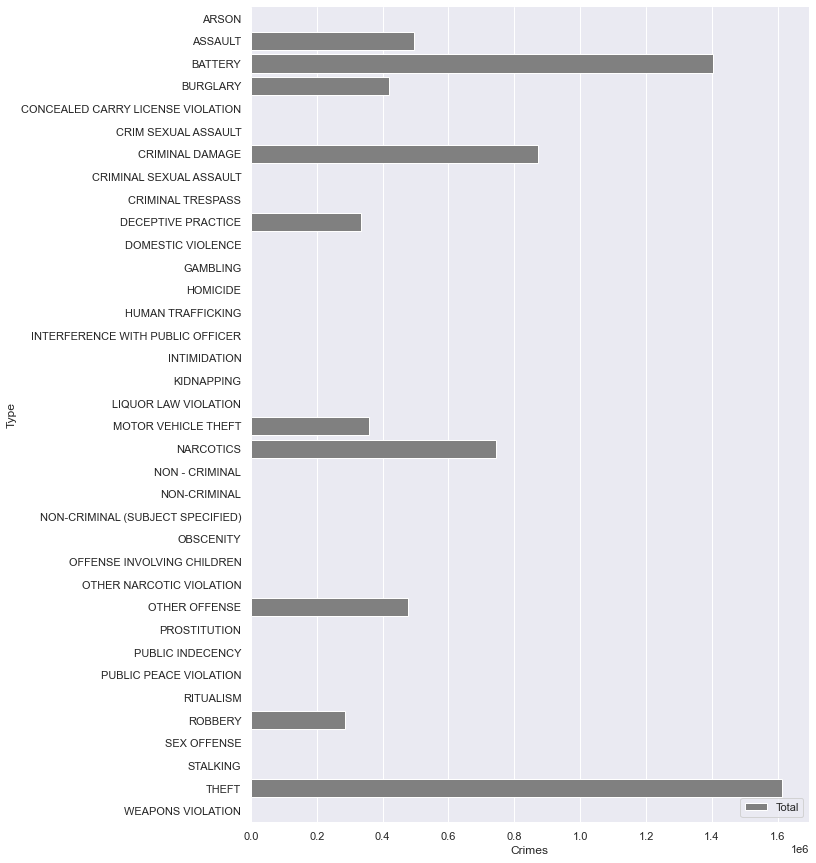

In [9]:
# crime count graph
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(10, 15))
sns.set_color_codes("pastel")
sns.barplot(y="Primary_type", x="counts", data=crime_count.iloc[:10, :],label="Total", color="grey")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",xlabel="Crimes")
sns.despine(left=True, bottom=True)
plt.show()

In [10]:
b = pd.DataFrame(crime ,columns=['Primary_type','Arrest'])

In [11]:
domestic_count1 = pd.DataFrame(b.groupby(['Primary_type','Arrest']).size().sort_values(ascending=False).rename('counts').reset_index())
domestic_count1


,Primary_type,Arrest,counts
0,THEFT,False,1431175
1,BATTERY,False,1092361
2,CRIMINAL DAMAGE,False,812921
3,NARCOTICS,True,739782
4,BURGLARY,False,396311
...,...,...,...
67,RITUALISM,True,3
68,NON-CRIMINAL (SUBJECT SPECIFIED),True,3
69,PUBLIC INDECENCY,False,2
70,DOMESTIC VIOLENCE,True,1


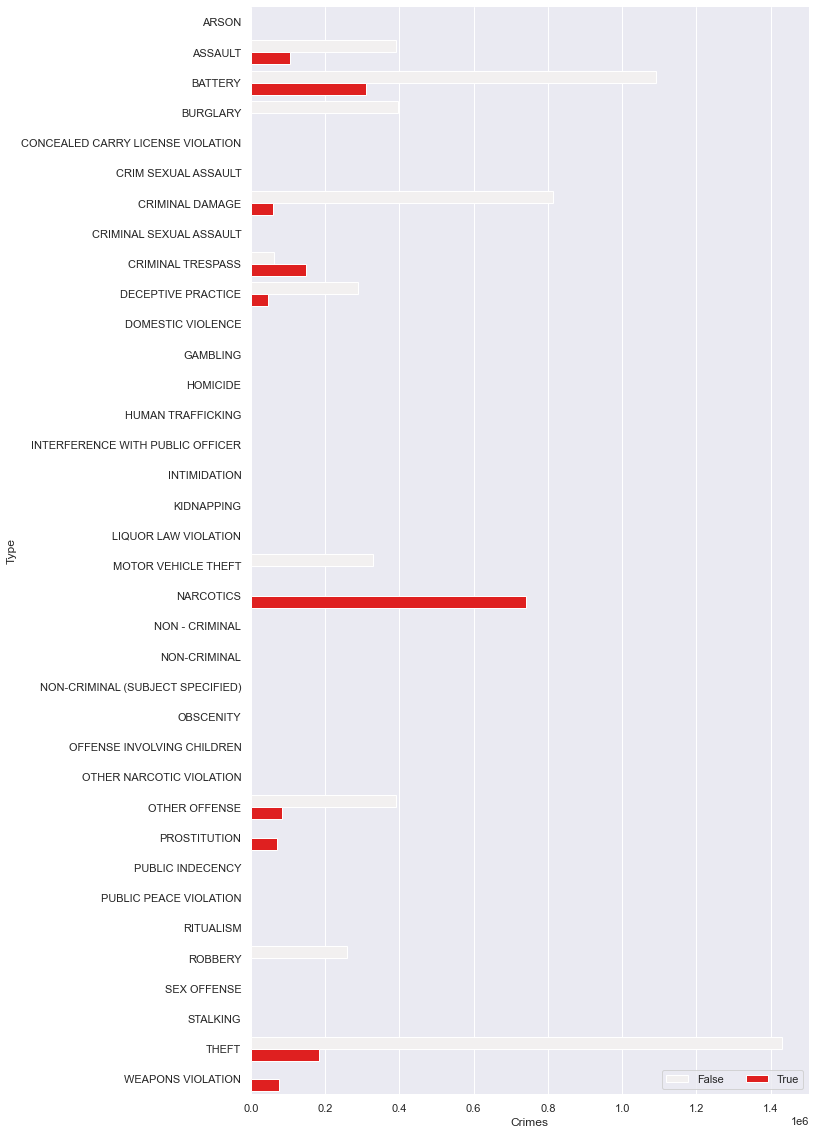

In [12]:
# bar chart to show arrest for crimes 
f, ax = plt.subplots(figsize=(10,20))

# Plot the total crashes
sns.set_color_codes("deep")
sns.barplot( y="Primary_type",x="counts" , data=domestic_count1.iloc[:20, :], hue='Arrest', color='red')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",xlabel="Crimes")
sns.despine(left=True, bottom=True)

### how often do domestic cases end in an arrest?

There are a total of 7,650,199 domestic cases in this dataset, out of all of those 199,064 end in an arrest

In [13]:
# make boolean column if domestic case results in arrest 
crime['domestic_arrest'] = (crime['Domestic']== True) & (crime['Arrest']== True)
crime.head()

,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location,domestic_arrest
Date,,,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",False
2015-09-04 11:30:00,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",False
2018-09-01 00:01:00,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,False
2015-09-05 12:45:00,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",False
2015-09-05 13:00:00,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",False


In [14]:
crime.domestic_arrest.value_counts()

False    7451135
True      199064
Name: domestic_arrest, dtype: int64

narcotics have 744,216 and out of those 739,782 arrests 

In [15]:
crime['narco_arrest'] = np.where((crime['Primary_type'] == 'NARCOTICS') & (
    crime['Arrest'] == True), 1, 0)

In [16]:
crime.narco_arrest.value_counts()

0    6910417
1     739782
Name: narco_arrest, dtype: int64

How many beats per community area?

In [17]:
crime.Beat.nunique()

304

In [18]:
crime.head()

,ID,Case_num,Date,Block,IUCR,Primary_type,Description,Location_desc,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X Coordinate,Y Coordinate,Year,Updated_On,Latitude,Longitude,Location,domestic_arrest,narco_arrest
Date,,,,,,,,,,,,,,,,,,,,,,,,
2015-09-05 13:30:00,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)",False,0
2015-09-04 11:30:00,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)",False,0
2018-09-01 00:01:00,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,False,0
2015-09-05 12:45:00,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)",False,1
2015-09-05 13:00:00,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)",False,0


In [19]:
crime.isnull().sum()

ID                      0
Case_num                4
Date                    0
Block                   0
IUCR                    0
Primary_type            0
Description             0
Location_desc        9663
Arrest                  0
Domestic                0
Beat                    0
District               47
Ward               614847
Community_Area     613476
FBI_Code                0
X Coordinate        81233
Y Coordinate        81233
Year                    0
Updated_On              0
Latitude            81233
Longitude           81233
Location            81233
domestic_arrest         0
narco_arrest            0
dtype: int64

### How often do Crimes occur?

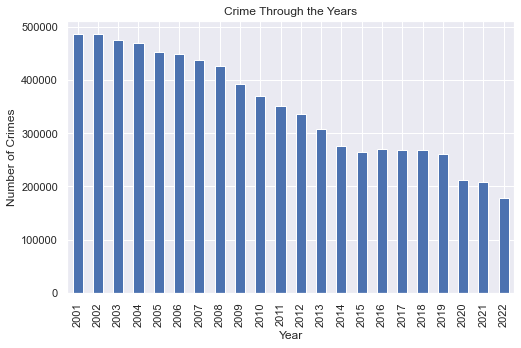

In [20]:
plt.figure(figsize = (8,5))
crime.groupby([crime.index.year]).size().plot.bar()
plt.title('Crime Through the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

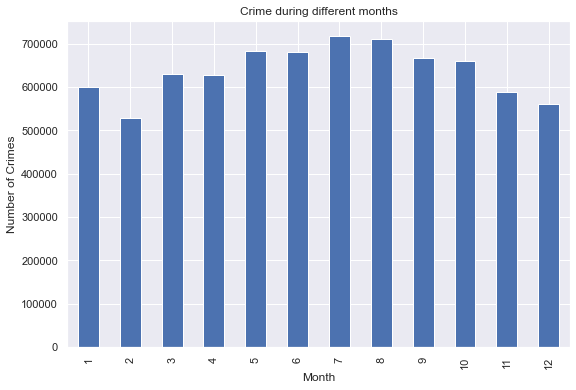

In [21]:
plt.figure(figsize = (9,6))
crime.groupby([crime.index.month]).size().plot.bar()
plt.title('Crime during different months')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

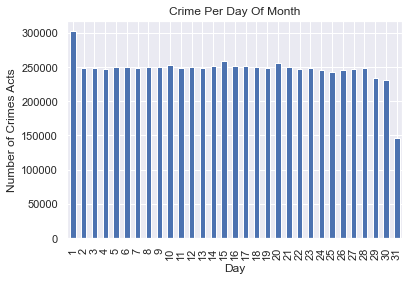

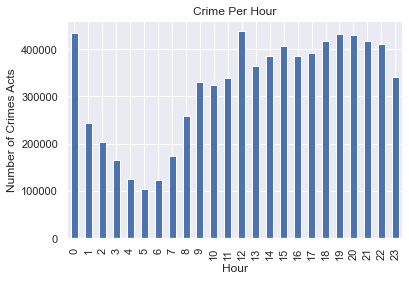

In [22]:
crime.groupby([crime.index.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes Acts')
plt.show()

crime.groupby([crime.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [23]:
crime_2012 = crime.loc['2012']
crime_2013 = crime.loc['2013']
crime_2014 = crime.loc['2014']
crime_2015 = crime.loc['2015']
crime_2016 = crime.loc['2016']
crime_2017 = crime.loc['2017']
arrest_yearly = crime[crime['Arrest'] == True]['Arrest']

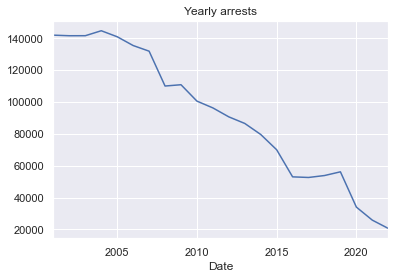

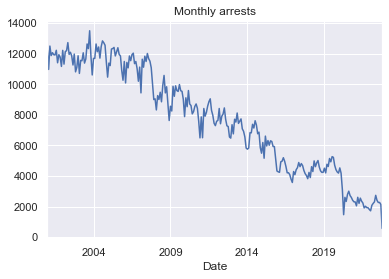

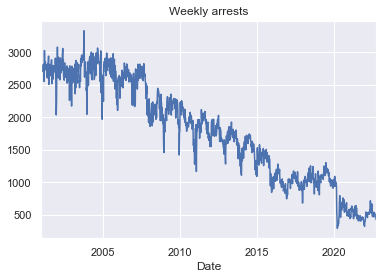

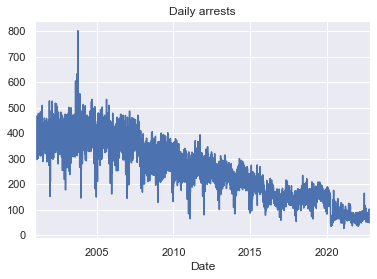

In [24]:
plt.subplot()

# yearly arrest
arrest_yearly.resample('A').sum().plot()
plt.title('Yearly arrests')
plt.show()

# monthly arrest
arrest_yearly.resample('M').sum().plot()
plt.title('Monthly arrests')
plt.show()

# weekly arrest
arrest_yearly.resample('W').sum().plot()
plt.title('Weekly arrests')
plt.show()

# daily arrest
arrest_yearly.resample('D').sum().plot()
plt.title('Daily arrests')
plt.show()
plt.show()

You can see a dip in crimes for 2020 when covid started and a spike in crimes in 2003. 

In [ ]:
# daily arrest
arrest_yearly.resample('D').sum().nlargest(10)

In [ ]:
crime.head()

In [ ]:
# look at the date of the spikes 
df2 = crime.loc['2003-10-16':'2003-10-17']
df2.head()

In [ ]:
df2.Primary_type.value_counts()

In [ ]:
# look at the date of the spikes 
df3 = crime.loc['2003-10-16']
df3.head()

In [ ]:
df3.Primary_type.value_counts()

In [ ]:
df4 = crime.loc['2003-10-17']
df4.head()

In [ ]:
df4.Primary_type.value_counts()

### percentage of arrests 

In [26]:
# Convert values into percentages
arrest_df = crime['Arrest'].value_counts()
arrest_percent = (arrest_df / crime['Arrest'].sum()) * 100 

arrest_percent.rename("% of Arrests",inplace=True)

#Rename True and False to % Arrested and % Not Arrested
arrest_percent.rename({True: '% Arrested', False: '% Not Arrested'},inplace=True)

<AxesSubplot:ylabel='% of Arrests'>

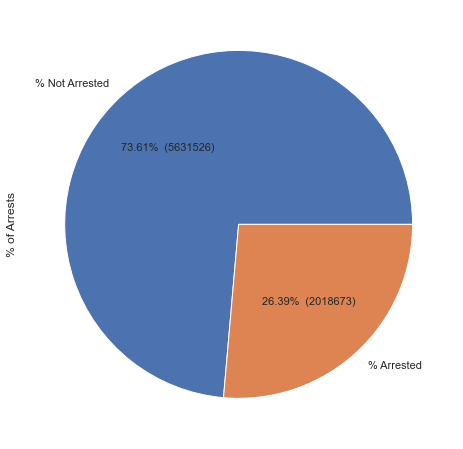

In [29]:
#pie chart to show percentage and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

#plot results in a pie chart
arrest_percent.plot.pie(fontsize=11,
                       autopct=make_autopct(crime['Arrest'].value_counts()),
                       figsize=(8, 8))


In [25]:
## Group dataset by year and arrests
arrest_per_year = crime.groupby('Year')['Arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,Arrest,Counts,Percentage
Year,,,
2001,False,343924,70.787666
2001,True,141929,29.212334
2002,False,345231,70.919321
2002,True,141563,29.080679
2003,False,334391,70.253605
2003,True,141586,29.746395
2004,False,324718,69.174890
2004,True,144698,30.825110
2005,False,312841,68.944004


In [ ]:
crime.head()